自行车共享的探索性数据分析
我将会看到3个关键分析：
- 探索车手的分布
- 探索时间和骑手数量之间的关系
- 探索天气和骑手数量之间的关系。

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

＃＃ 加载数据中
数据文档如下：
```
instant：记录索引
dteday：日期
season：季节（1：春季，2：夏季，3：秋季，4：冬季）
yr：年（0：2011,1：2012）
mnth：月份（1至12）
hr：小时（0至23）
holiday：无论是假期还是假期
weekday：星期几
workingday：如果日子既不是周末也不是假日
weathersit：
     1：晴朗或部分阴天
     2：雾+云
     3：小雪或雨
     4：大雨或雪
温：以摄氏度为单位的归一化温度（除以41）
atemp：以摄氏度标准化的感觉温度（除以50）
哼声：标准化的湿度百分比（除以100）
风速：归一化风速（除以67）
随便：计数的临时用户
注册：注册用户数量
cnt：包括临时和已登记的总租赁自行车的数量
=

In [2]:
bike = pd.read_csv("data/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 数据准备

首先查列，查看了“假期”和“工作日”。
- '假期'和'工作日'[0,1] - > [不，是]
- 将数字描述“工作日”的天数
- 将'weathersit'作为天气描述符

定改变所有这些值以使数据框更易于阅读。

In [3]:
bike['holiday'] = bike['holiday'].replace([0,1], ['no','yes'], inplace=False)
bike['weekday'] = bike['weekday'].replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
bike['workingday'] = bike['workingday'].replace([0,1],['no','yes'])
bike['weathersit'] = bike['weathersit'].replace([1,2,3,4],['Clear','Mist','Light','Heavy'])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,no,Sat,no,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,no,Sun,no,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,no,Mon,yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,no,Tue,yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,no,Wed,yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


＃每日计数
所提供的数据的粒度是每小时一次。 不过，我相信每日统计数据非常有用。

daily_counts
*`'casual'：每天总休闲车手
*“注册”：每天的注册车手总数
*`'workingday'`：这一天是否是工作日（是或否）

In [4]:
counts = bike.filter(items=['dteday','casual','registered','workingday'])
daily_counts = counts.groupby('dteday').agg(sum)
daily_day = counts.groupby('dteday').agg(max)

daily_counts['workingday'] = daily_day['workingday']
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


# 探寻骑手的分布情况
使用每天骑手数据，可以绘制会员数和非会员数情况分布

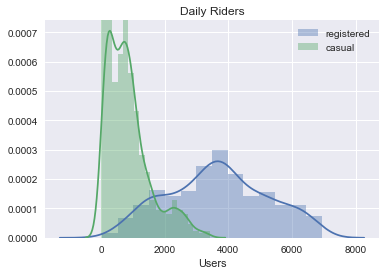

In [5]:
reg = [daily_counts['registered'],'registered']
cas = [daily_counts['casual'],'casual']
for a in [reg,cas]:
    sns.distplot(a[0],label=a[1])
plt.legend()
plt.title('Daily Riders')
plt.xlabel('Users')
plt.show()

从图表中可以看出，与注册用户相比，非注册用户每天的存在量要小得多。

注册用户有一个从0到8000的区间，而在0-2000之间的与非注册用户一致，最大值为4000。

## 探寻注册会员和非会员骑手与工作日和非工作日之间的关系

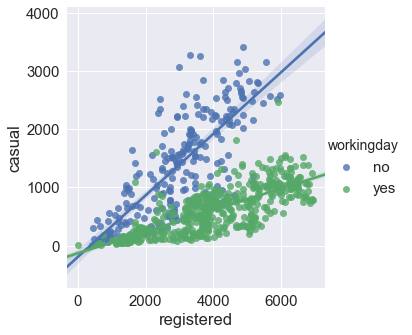

In [6]:
sns.set(font_scale=1.5)
sns.lmplot(data = daily_counts, x='registered', y='casual',hue='workingday')
plt.show()

该图表明，注册用户的数量在工作日上升，在周末下降，而临时用户则呈现相反的趋势。








##双变量核密度图
我可以使用双变量KDE来重新绘制上图中的重叠图

C:\Users\WorkStation\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


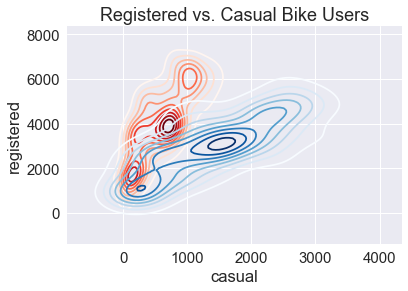

In [7]:
#工作日骑行车人数图
c_day = daily_counts[daily_counts['workingday'] ==  'yes']
r_day = daily_counts[daily_counts['workingday'] == 'yes']

#工作日骑行的kde(kernel density estimation)核密度估计图
sns.kdeplot(c_day['casual'], r_day['registered'], cmap="Reds", label = 'work day')

#非工作日骑行人数图
c_end = daily_counts[daily_counts['workingday'] ==  'no']
r_end = daily_counts[daily_counts['workingday'] == 'no']

#非工作日骑行的kde(kernel density estimation)核密度估计图
sns.kdeplot(c_end['casual'], r_end['registered'], cmap="Blues", label = 'weekend')
plt.title('Registered vs. Casual Bike Users')
plt.show()

这个图可以让我们看到隐藏的值，否则就会显示出来。

#探索时间趋势
回顾数据，现在我要按时间和日期查找趋势。
在六月份绘制每小时自行车共享数据图


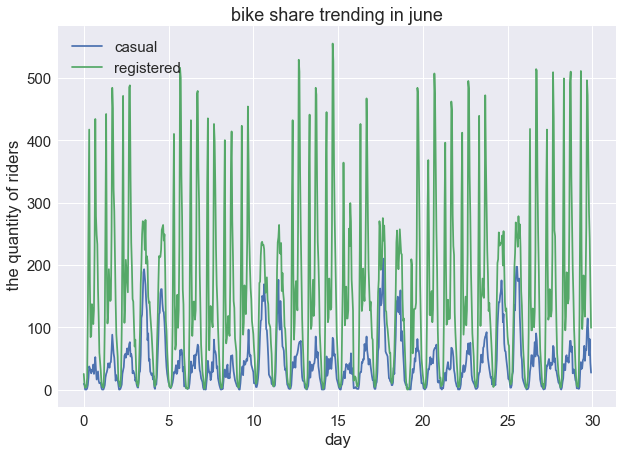

In [8]:
#操作数据集获得六月份数据
bike = pd.read_csv("data/hour.csv")
new_count = bike[3530:4250]
new_count.head(10)
june_cas = new_count.filter(items=['dteday', 'hr','casual']).groupby(['dteday', 'hr']).sum()
plt.figure(figsize=(10, 7))
june_reg = new_count.filter(items=['dteday', 'hr','registered']).groupby(['dteday', 'hr']).sum()

#操作x轴以显示天/时间
day = [int(i[-2:]) for i in list(new_count['dteday'])]
hours = [int(i)*.04 for i in list(new_count['hr'])]
days = [(x + y) -1  for (x, y) in zip(day, hours)]

#plot the data
plt.plot(days, list(june_cas['casual']), label='casual')
plt.plot(days, list(june_reg['registered']), label='registered')
plt.legend()
plt.title('bike share trending in june')
plt.xlabel('day')
plt.ylabel(' the quantity of riders')
plt.show()

从数据中我们可以看到，登记注册车手在工作日里主要使用这项服务，并在周末大幅度下降。
相反，非注册登记车手在周末大幅增加，几乎与注册用户的数量相匹配。

# 每日活跃骑手
接下来，我们将绘制给定日期的用户活动并查找用户趋势。
首先，我将绘制整个数据集的每小时平均活动数，并将它们与3个图进行比较。
平日活动
周末活动
假日活动

In [9]:
#Graphing function
def graph(df,title=''):
    cas = df.filter(items=['dteday', 'hr','casual']).groupby(['hr']).mean()
    reg = df.filter(items=['dteday', 'hr','registered']).groupby(['hr']).mean()
    plt.plot(cas, label='casual')
    plt.plot(reg, label='registered')
    plt.title(title)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Count')
    plt.legend()
    plt.show()

## 每小时平均用户活跃量

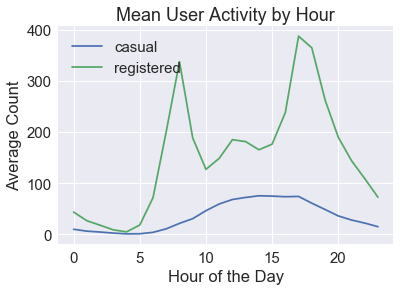

In [10]:
#plot the data
graph(bike, 'Mean User Activity by Hour')

我们可以从图中看到，注册用户主要在工作日的上午8点和下午5点左右使用该服务。

## 平日活跃用户

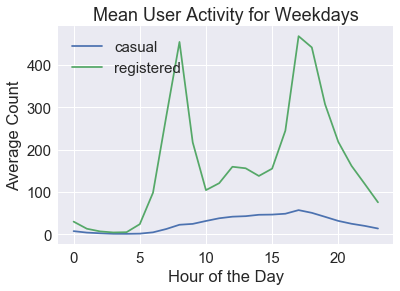

In [30]:
weekday_data = bike[bike['workingday']==1]
graph(weekday_data,'Mean User Activity for Weekdays')

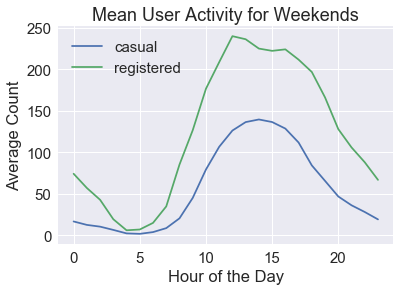

In [29]:
weekend_data = bike[bike['workingday']==0]
graph(weekend_data, 'Mean User Activity for Weekends')

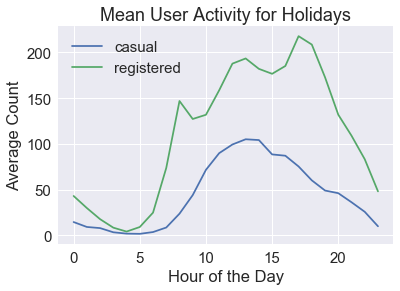

In [15]:
holiday_data = bike[bike['holiday']==1]
graph(holiday_data, 'Mean User Activity for Holidays')

我们现在有4个不同的基于日期的用户数据图并按小时绘制。

在每张图中，我们可以看到平均登记注册用户数比普通用户多。

全年的平均值与周日图看起来最为相似，这是预计的，因为平日中的大部分日子有3种类别（工作日，周末，假日）。

# 探索天气对共享单车的影响

首先，我在自行车上创建了一个名为“propCasual”的新栏目，该栏目是在给定时间内随意车手(未登记)与车手车手的比例。

这对于观察天气对骑手的影响很有用。

In [32]:
bike['propCasual'] = (bike['casual'] / (bike['casual'] + bike['registered']))
bike = bike.fillna(0)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,propCasual
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.000000


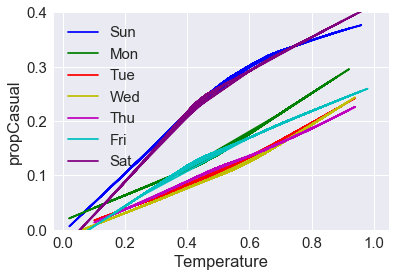

In [33]:
from statsmodels.nonparametric.smoothers_lowess import lowess
labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
colors = ['b','g','r','y','m','c','purple' ]
for i in range(7):
    #print(labels[i])
    #print(bike['weekday'])
    dayOfWeek = bike[ bike['weekday']==i]
    ysmooth = lowess(dayOfWeek['temp'],dayOfWeek['propCasual'], return_sorted=False)
    x = dayOfWeek['temp']
    y = dayOfWeek['propCasual']
    ysmooth = lowess(y, x, return_sorted=False)
    plt.plot(x, ysmooth, 'r-', label = labels[i], color=colors[i])
plt.xlabel('Temperature')
plt.ylabel('propCasual')
plt.ylim(0,.4)
plt.legend()
plt.show()


图中显示，周六和周日的休闲车手比例最高。

这与我们在之前的图中观察到的数据一致。

此图显示的新的有趣信息是温度与临时用户之间的自行车份额租赁的关系。 温度越高，临时用户的比例就越高。

我们不能说更多的用户在温暖的天气中使用自行车份额，因为第三个变量可能是原因。 （即夏季更多的休闲用户，夏季温度较高）